#### Generating 'sine' values

In [44]:
import numpy as np
step_size = (20*np.pi/1000)
points = np.arange(1000) #returns evenly space points b/w 0 and 1000
points = step_size*points  #now distance b/w two points is 20*np.pi/1000
dataset = np.sin(points)[:,None] #creates sine values at generated points

#### Plotting the generated sine values

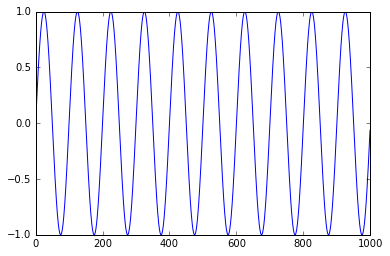

In [45]:
import matplotlib.pyplot as plt
plt.plot(dataset)
plt.show()

#### Function - Generate X and Y for the LSTM

In [46]:
# convert an array of values into a dataset matrix
# look_back looks back previous (look_back - 1) datapoints
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Normalizing the dateset

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset) #normalize dataset into the range (0, 1)

#### Splitting the dataset into train and test datasets

In [48]:
train_size = int(len(dataset)*0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

#### Window of 20 time steps

In [49]:
look_back = 20

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print trainX.shape
print trainY.shape
print testX.shape
print testY.shape

(650, 20)
(650,)
(310, 20)
(310,)


#### Reshaping the trainX and testX into a format that is expected by an LSTM network. i.e. [samples, time steps, features].

In [50]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print 'trainX shape = ', trainX.shape
print 'testX shape   = ', testX.shape

print trainX[0], '=>' , trainY[0]
print trainX[1], '=>' , trainY[1]

trainX shape =  (650, 20, 1)
testX shape   =  (310, 20, 1)
[[0.5       ]
 [0.53139526]
 [0.56266662]
 [0.59369066]
 [0.62434494]
 [0.6545085 ]
 [0.68406228]
 [0.71288965]
 [0.74087684]
 [0.7679134 ]
 [0.79389263]
 [0.81871199]
 [0.84227355]
 [0.86448431]
 [0.88525662]
 [0.9045085 ]
 [0.92216396]
 [0.93815334]
 [0.95241353]
 [0.96488824]] => 0.9755282581475768
[[0.53139526]
 [0.56266662]
 [0.59369066]
 [0.62434494]
 [0.6545085 ]
 [0.68406228]
 [0.71288965]
 [0.74087684]
 [0.7679134 ]
 [0.79389263]
 [0.81871199]
 [0.84227355]
 [0.86448431]
 [0.88525662]
 [0.9045085 ]
 [0.92216396]
 [0.93815334]
 [0.95241353]
 [0.96488824]
 [0.97552826]] => 0.9842915805643155


#### Building the LSTM model

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

batch_size = 1
model = Sequential()
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
for i in range(200):
    print "Epoch No = ", i
    model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=1, shuffle=False)
    model.reset_states()

Epoch No =  0
Epoch 1/1
650/650 [==============================] - 59s 91ms/step - loss: 0.1040 - acc: 0.0169
Epoch No =  1
Epoch 1/1
650/650 [==============================] - 57s 88ms/step - loss: 0.0434 - acc: 0.0185
Epoch No =  2
Epoch 1/1
650/650 [==============================] - 59s 91ms/step - loss: 0.0165 - acc: 0.0200
Epoch No =  3
Epoch 1/1
650/650 [==============================] - 58s 89ms/step - loss: 0.0095 - acc: 0.0200
Epoch No =  4
Epoch 1/1
650/650 [==============================] - 63s 97ms/step - loss: 0.0109 - acc: 0.0200
Epoch No =  5
Epoch 1/1
650/650 [==============================] - 53s 82ms/step - loss: 0.0080 - acc: 0.0200
Epoch No =  6
Epoch 1/1
650/650 [==============================] - 54s 83ms/step - loss: 0.0117 - acc: 0.0200
Epoch No =  7
Epoch 1/1
650/650 [==============================] - 58s 88ms/step - loss: 0.0149 - acc: 0.0200
Epoch No =  8
Epoch 1/1
650/650 [==============================] - 54s 83ms/step - loss: 0.0078 - acc: 0.0200
Epoch No =

650/650 [==============================] - 51s 79ms/step - loss: 0.0048 - acc: 0.0200
Epoch No =  74
Epoch 1/1
650/650 [==============================] - 49s 76ms/step - loss: 0.0090 - acc: 0.0200
Epoch No =  75
Epoch 1/1
650/650 [==============================] - 50s 78ms/step - loss: 0.0041 - acc: 0.0200
Epoch No =  76
Epoch 1/1
650/650 [==============================] - 47s 73ms/step - loss: 0.0043 - acc: 0.0200
Epoch No =  77
Epoch 1/1
650/650 [==============================] - 49s 76ms/step - loss: 0.0057 - acc: 0.0200
Epoch No =  78
Epoch 1/1
650/650 [==============================] - 51s 78ms/step - loss: 0.0052 - acc: 0.0200
Epoch No =  79
Epoch 1/1
650/650 [==============================] - 50s 77ms/step - loss: 0.0066 - acc: 0.0200
Epoch No =  80
Epoch 1/1
650/650 [==============================] - 49s 76ms/step - loss: 0.0059 - acc: 0.0200
Epoch No =  81
Epoch 1/1
650/650 [==============================] - 50s 77ms/step - loss: 0.0036 - acc: 0.0200
Epoch No =  82
Epoch 1/1
6

650/650 [==============================] - 55s 85ms/step - loss: 0.0037 - acc: 0.0200
Epoch No =  147
Epoch 1/1
650/650 [==============================] - 57s 87ms/step - loss: 0.0032 - acc: 0.0200
Epoch No =  148
Epoch 1/1
650/650 [==============================] - 56s 87ms/step - loss: 0.0042 - acc: 0.0200
Epoch No =  149
Epoch 1/1
650/650 [==============================] - 56s 86ms/step - loss: 0.0032 - acc: 0.0200
Epoch No =  150
Epoch 1/1
650/650 [==============================] - 55s 84ms/step - loss: 0.0022 - acc: 0.0200
Epoch No =  151
Epoch 1/1
650/650 [==============================] - 55s 84ms/step - loss: 0.0026 - acc: 0.0200
Epoch No =  152
Epoch 1/1
650/650 [==============================] - 54s 84ms/step - loss: 0.0044 - acc: 0.0200
Epoch No =  153
Epoch 1/1
650/650 [==============================] - 63s 97ms/step - loss: 0.0037 - acc: 0.0200
Epoch No =  154
Epoch 1/1
650/650 [==============================] - 57s 87ms/step - loss: 0.0026 - acc: 0.0200
Epoch No =  155
Ep

In [52]:
trainScore = model.evaluate(trainX, trainY, batch_size=1, verbose=1)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, batch_size=1, verbose=1)
print('Test Score: ', testScore)

650/650 [==============================] - 7s 11ms/step
('Train Score: ', [0.0015479132992221331, 0.02])
310/310 [==============================] - 2s 7ms/step
('Test Score: ', [0.0014415162501098995, 0.01935483870967742])


#### Predicting Future Values of Sine Function

In [53]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=1)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

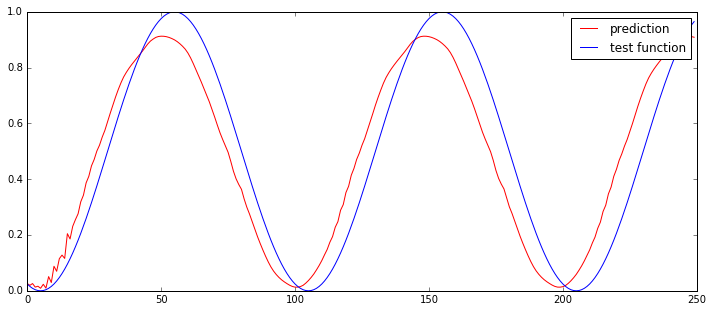

In [54]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()